## Welcome to Day 7 - Python Visualization I Hands On Notebook!

Setelah diberikan pemaparan tentang prinsip-prinsip visualisasi, mari kita lanjutkan ke Hands-On dengan langsung mempraktekkan beberapa jenis visualisasi yang mendasar bagi seorang Data Scientist. 

Dataset yang akan kita gunakan adalah:
- Telco Customer Churn dari Kaggle: https://www.kaggle.com/blastchar/telco-customer-churn
- Dummy Apartment Price Data

Pada pertemuan ini, kita berfokus pada ***membuat visualisasi dasar***. Pada pertemuan berikutnya, baru kita akan belajar cara-cara mempercantik visualisasi kita.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('telco_customer_churn.csv')
df2 = pd.read_csv('apartment_data.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df2.head()

,Unit_ID,Region,Locality,Furnished,Bathroom,No_Rooms,Area,AnnualPrice
0,kmva045,Jakarta Selatan,Kemang,1,1,0,43.0,132000000
1,mg2c209,Jakarta Barat,Tanjung Duren,1,1,2,42.0,55000000
2,tmjc172,Jakarta Pusat,Kemayoran,1,1,2,62.0,75000000
3,kgca002,Jakarta Selatan,Kebagusan,1,1,0,28.0,38000000
4,kpcc002,Jakarta Selatan,Kuningan,1,1,2,75.0,168000000


### Part 1: Box Plots

Box Plot adalah jenis visualisasi yang mampu memberikan insights tentang penyebaran data univariat numerik. Pada box plots, langsung terlihat ***Q1, Q2 (Median), Q3, Interquartile Range, dan Outliers***.

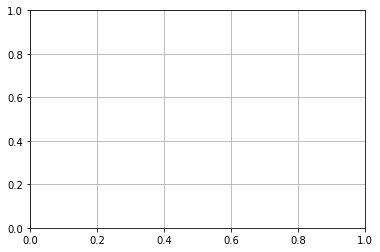

In [5]:
fig = plt.figure()  # membuat 'figure' baru
ax = plt.axes() # membuat sumbu (x dan y)
plt.grid() # membuat petak-petak atau gridlines
plt.show() # menampilkan plot

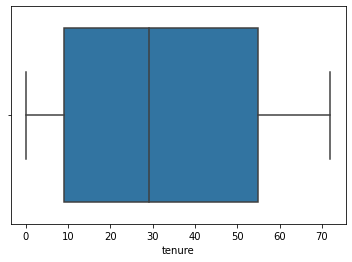

In [6]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'tenure')
plt.show() 

Dari visualisasi di atas, dapat dikatakan bahwa:
- Q1 Tenure berada di sekitar 10 bulan
- Q2 (Median) Tenure berada di 28-30 bulan
- Q3 Tenure berada di sekitar 55 bulan
- Minimum (0) dan Maximum (over 70) masih berada di dalam `Interquartile Range` sehingga tidak ada Outliers

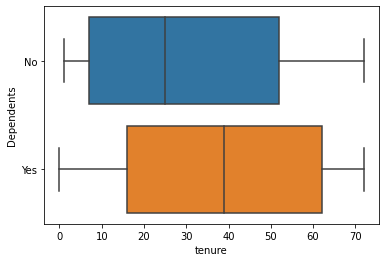

In [7]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'tenure', y = 'Dependents')
plt.show() 

Kita juga bisa membuat boxplot berdasarkan 'kategori' dari feature lain. Pada gambar di atas, kita dapat melihat bahwa:

"Bagi orang-orang yang memiliki dependents (tanggungan), tenure nya cenderung lebih lama dibandingkan orang-orang yang tidak memiliki tanggungan"

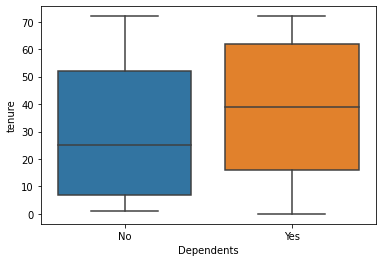

In [8]:
fig = plt.figure()  
ax = sns.boxplot(data = df, y = 'tenure', x = 'Dependents')
plt.show() 

Dengan mengganti x dan y, kita bisa memutarkan grafik kita seperti di atas.

### Part 2: Univariate Visualization

Visualisasi univariat artinya melakukan visualisasi hanya pada 1 variabel saja. Biasanya, untuk data numerik, (data berwujud angka, bilangan), kita melakukan visualisasi distribusi untuk mengetahui penyebaran data. Visualisasi ini disebut histogram.

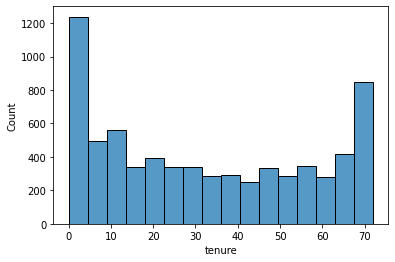

In [9]:
fig = plt.figure()  
ax = sns.histplot(data = df, x='tenure')
plt.show() 

Berdasarkan visualisasi ini, kita dapat mengetahui bahwa kebanyakan customer memiliki tenure yang sangat singkat atau sangat lama (terindikasikan dari tingginya 'bar' di awal dan di akhir). 

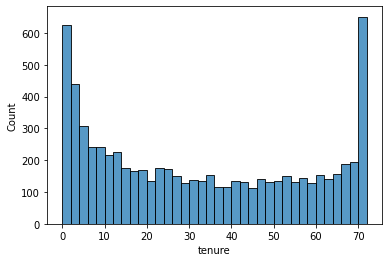

In [10]:
fig = plt.figure()  
ax = sns.histplot(data = df, x='tenure', binwidth = 2)
plt.show() 

Pada histogram, suatu pengaturan yang dapat dilakukan adalah `binwidth`. Semakin besar `binwidth` maka semakin besar pula `range` dari setiap `bar`. Semakin kecil `binwidth` nya, maka detil dari penyebaran data akan semakin terlihat jelas.

Selain histogram yang kesannya 'patah-patah', ada juga 'Density Plot' yang memiliki fungsi yang sama, namun kali ini grafiknya lebih 'mulus'.

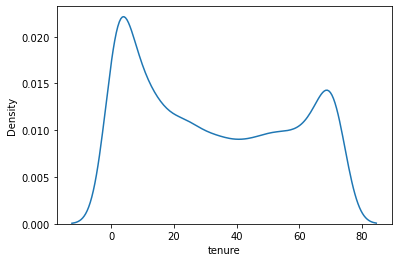

In [11]:
fig = plt.figure()  
ax = sns.kdeplot(data = df, x='tenure')
plt.show() 

### Part 3: Bivariate Visualization

#### Part 3.1. Continuous vs Continuous (Numerical vs Numerical)

Untuk visualisasi data Numerical vs Numerical, biasanya kita melakukan `scatterplot`. 

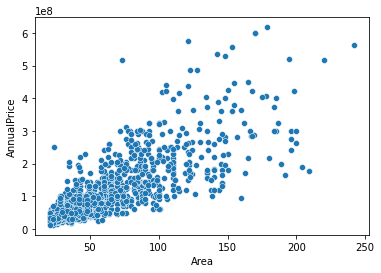

In [12]:
fig = plt.figure()  
ax = sns.scatterplot(data = df2, x='Area', y = 'AnnualPrice')
plt.show() 

Berdasarkan gambar di atas, kita dapat melihat bahwa terdapat kecenderungan bahwa semakin luas suatu Apartment, maka semakin luas pula harga sewa per tahunnya.

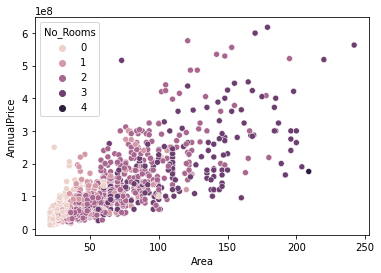

In [13]:
fig = plt.figure()  
ax = sns.scatterplot(data = df2, x='Area', y = 'AnnualPrice', hue = 'No_Rooms')
plt.show() 

Kita juga dapat menambahkan warna di scatterplot. Pada contoh di atas, kita menambahkan warna. Warna lebih muda adalah unit Apartment yang memiliki jumlah Bedroom (kamar) lebih sedikit. Di sini, kita dapat melihat bahwa luas bertambah seiring bertambahnya jumlah kamar, dan hal ini juga diiringi dengan naiknya harga sewa tahunan per unit apartemen.

#### Part 3.2. Categorical vs Categorical

Biasanya, ketika dua variabel yang ingin kita analisa sama-sama berbentuk kategorikal, kita ingin mengetahui jumlah dan proporsi antara dua variabel tersebut. 

Contoh: kita ingin melihat, untuk customer yang Churn dan Not Churn, berapa jumlah Pria vs Wanita?

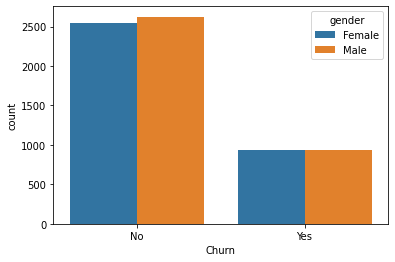

In [14]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Churn', hue = 'gender')
plt.show() 

Dari count plot di atas, kita dapat melihat bahwa jumlah customer yang Not Churn lebih banyak daripada jumlah customer yang Churn. Namun, rasio antara Pria dan Wanita ternyata cukup berimbang.

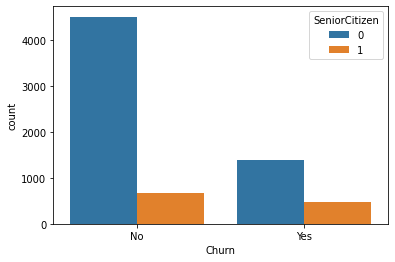

In [15]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Churn', hue = 'SeniorCitizen')
plt.show() 

Dari plot di atas, kita dapat melihat bahwa lebih banyak customer yang merupakan non-Senior Citizen daripada Senior Citizen.

Bentuk lain dari categorical vs categorical visualization adalah `Stacked Bar Plot`. Pada `Stacked Bar Plot`, kita tidak memfokuskan pada jumlah, namun lebih menitikberatkan pada rasio. 

In [16]:
### Step 1: Buat dulu crosstab seperti ini

pd.crosstab(df['SeniorCitizen'], df['Churn']).apply(lambda x: x*100/x.sum(), axis = 1)

Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


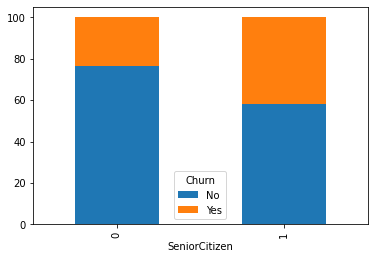

In [17]:
pd.crosstab(df['SeniorCitizen'], df['Churn']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar', stacked = True)
plt.show()

Begini interpretasinya:
- 20% dari Non-Senior Citizen Churn, 80% dari Non-Senior Citizen Not-Churn
- 40% dari Senior Citizen Churn, 60% dari Senior Citizen Not-Churn

Bagaimana jika kita ingin kebalikannya?

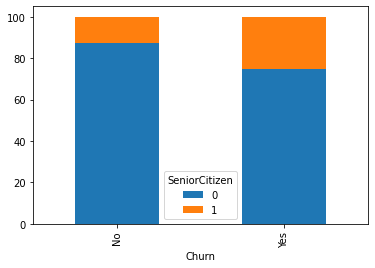

In [18]:
pd.crosstab(df['Churn'], df['SeniorCitizen']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar', stacked = True)
plt.show()

- 10% dari customer yang non-churn adalah Senior Citizen, 90% dari customer yang non-churn adalah non-senior citizen
- lebih dari 20% dari customer yang churn adalah Senior Citizen, sekitar 80% dari customer yang churn adalah non-senior citizen

#### Part 3.3. Categorical vs Continuous

Pada visualisasi Categorical vs Continuous, biasanya kita ingin melihat distribusi dari suatu variabel univariat namun ingin dipecah berdasarkan 'kelas-kelas' tertentu (pemecahan ini tergantung variabel kategorikal). 

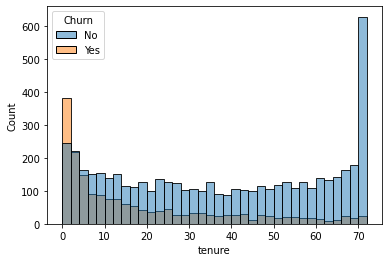

In [19]:
fig = plt.figure()  
ax = sns.histplot(data = df, x='tenure', hue = 'Churn', binwidth = 2)
plt.show() 

Sebagai contoh, kita bisa me 'numpukkan' dua histogram dalam satu grafik, namun menyajikan mereka dalam warna yang berbeda. Pada grafik ini, kita dapat melihat bahwa kebanyakan customer yang `Churn` memiliki `tenure` yang pendek. Namun, customer yang `Tidak Churn` (No) memiliki `tenure` yang panjang. 

Selain contoh visualisasi di atas, kita juga bisa, misalnya, ingin tahu berapa biaya bulanan yang dibayarkan oleh customer berdasarkan InternetService yang mereka miliki. Untuk melakukan visualisasi seperti ini, kita menggunakan bantuan `pandas`. 

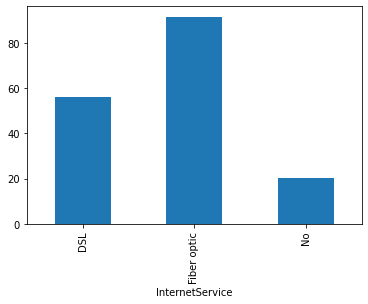

In [20]:
df.groupby(['InternetService'])['MonthlyCharges'].median().plot(kind = 'bar')
plt.show()

Berarti, internet Fiber Optic memiliki median harga tertinggi. 

### Part 4: Time Series Visualization

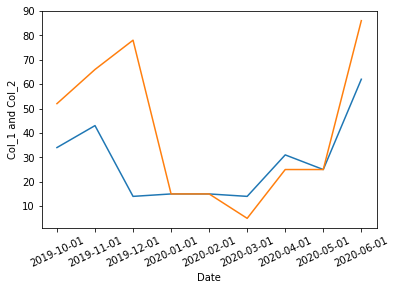

In [21]:
# importing packages
import seaborn as sns
import pandas as pd
  
# creating data
df = pd.DataFrame({'Date': ['2019-10-01', '2019-11-01', 
                            '2019-12-01','2020-01-01', 
                            '2020-02-01', '2020-03-01',
                            '2020-04-01', '2020-05-01', 
                            '2020-06-01'],
                     
                   'Col_1': [34, 43, 14, 15, 15,
                             14, 31, 25, 62],
                     
                   'Col_2': [52, 66, 78, 15, 15,
                             5, 25, 25, 86],
                     
                   'Col_3': [13, 73, 82, 58, 52,
                             87, 26, 5, 56],
                   'Col_4': [44, 75, 26, 15, 15,
                             14, 54, 25, 24]})
  
# create the time series plot
sns.lineplot(x = "Date", y = "Col_1", data = df)
sns.lineplot(x = "Date", y = "Col_2", data = df)
plt.ylabel("Col_1 and Col_2")
plt.xticks(rotation = 25)

plt.show()

### Part 5: What if I want to Visualize Complex Graphs?

Sering kali, visualisasi yang dibutuhkan dalam project hanyalah berkisar pada plot-plot di atas. Box Plot dan Histogram adalah visualisasi default untuk menggambarkan penyebaran pada data. Bar plot untuk membandingkan jumlah dan rasio. 

Namun, terkadang kita membutuhkan visualisasi bentuk lain yang mungkin saja tidak lazim dan tidak dibahas di 2 pertemuan Visualization in Python. Bagaimana menyikapinya? Tenang, ada https://python-graph-gallery.com/

Nah, di sinilah skill 'self-learning' dan 'jago googling' dari seorang Data Scientist bakal terpakai. Di Python Graph Gallery, terdapat banyak jenis visualisasi yang indah dan tidak lazim, dan mereka biasanya memberikan kode/contoh bagaimana cara meng-implementasinya. Mari ambil contoh kita ingin mengaplikasikan visualisasi di halaman ini: https://python-graph-gallery.com/132-basic-connected-scatterplot

In [22]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set figure default figure size
plt.rcParams["figure.figsize"] = (10, 6)
# Create a random number generator for reproducibility
rng = np.random.default_rng(1111)

# Get some random points!
x = np.array(range(10))
y = rng.integers(10, 100, 10)
z = y + rng.integers(5, 20, 10)

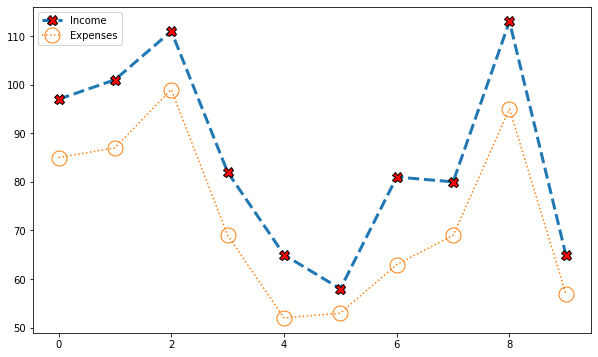

In [23]:
plt.plot(
    x, z, ls="--", lw=3, 
    marker="X", markersize=10, markerfacecolor="red", markeredgecolor="black",
    label="Income"
)
plt.plot(
    x, y, ls=":", 
    marker="o", markersize=15, markerfacecolor="None", 
    label="Expenses"
)
plt.legend()
plt.show()

Oke, bagaimana kalau kita masih ingin melakukan pie chart plotting? Bisa juga. 

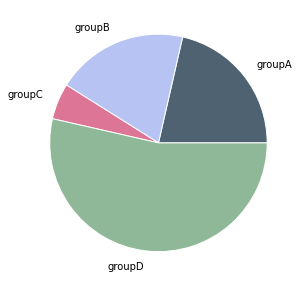

In [24]:
# library
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
# create random data
names='groupA', 'groupB', 'groupC', 'groupD',
values=[12,11,3,30]
 
# Create a set of colors
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']

# Use it thanks to the color argument
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors);

Pada pertemuan berikutnya, kita akan mempelejari 